# Exploratory Data Analysis - Retail

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
dic=dict()
[df[i].unique() for i in df.columns]

[array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
       dtype=object),
 array(['Consumer', 'Corporate', 'Home Office'], dtype=object),
 array(['United States'], dtype=object),
 array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
        'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
        'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
        'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
        'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
        'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
        'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
        'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
        'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
        'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
        'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
        'Fairfield', 'Grand Prairie',

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.drop(["Country"],axis=1, inplace=True)

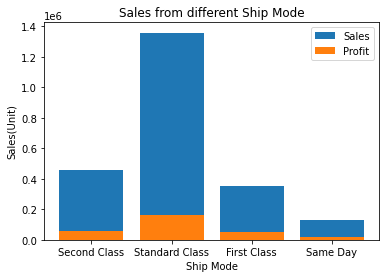

In [7]:
plt.xlabel("Ship Mode")
plt.ylabel("Sales(Unit)")
plt.title("Sales from different Ship Mode")
plt.bar(df["Ship Mode"].unique(),[df["Sales"][df["Ship Mode"]==i].sum() for i in df["Ship Mode"].unique()],label="Sales")
plt.bar(df["Ship Mode"].unique(),[df["Profit"][df["Ship Mode"]==i].sum() for i in df["Ship Mode"].unique()],label="Profit")
plt.legend()
plt.show()

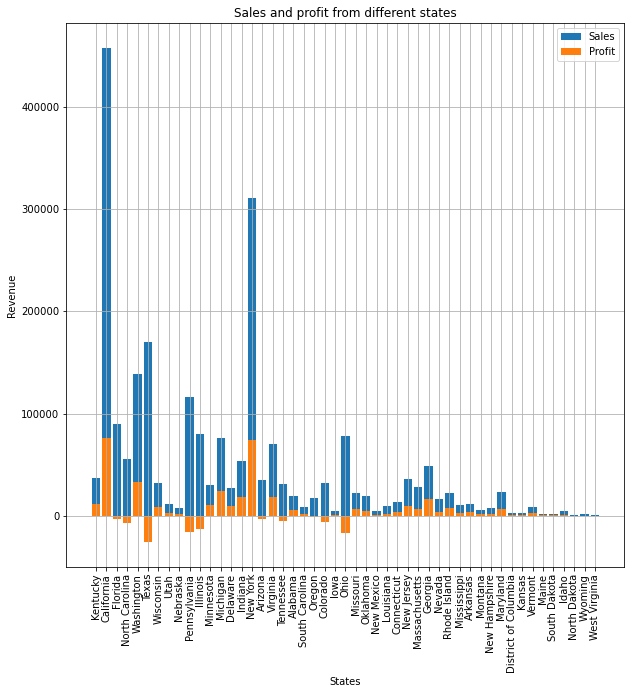

In [8]:
plt.figure(figsize=(10,10))
plt.xlabel("States")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.title("Sales and profit from different states")
plt.bar(df["State"].unique(), [df["Sales"][df["State"]==i].sum() for i in df["State"].unique()],label="Sales")
plt.bar(df["State"].unique(), [df["Profit"][df["State"]==i].sum() for i in df["State"].unique()],label="Profit")
plt.grid()
plt.legend()
plt.show()

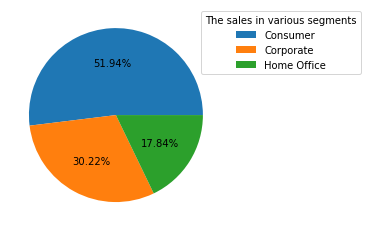

In [39]:
plt.pie([df["Segment"][df["Segment"]==i].count() for i in df["Segment"].unique()], autopct="%1.2f%%")
plt.legend(labels=df["Segment"].unique(), title="The sales in various segments", loc="upper right", bbox_to_anchor=(1.65, 1))
plt.show()

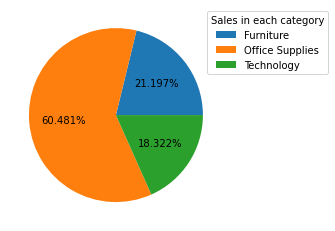

In [40]:
plt.pie([sum(df["Quantity"][df["Category"]==i]) for i in df["Category"].unique()], autopct="%1.3f%%")
plt.legend(title="Sales in each category", labels=df["Category"].unique(), loc="upper right", bbox_to_anchor=(1.5, 1))
plt.show()

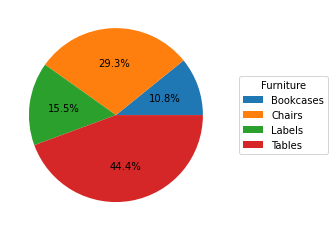

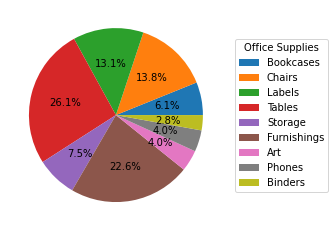

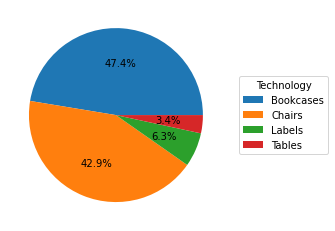

In [48]:
for i in df["Category"].unique():
    data=np.array([sum(df["Quantity"][df["Sub-Category"]==j][df["Category"]==i]) for j in df["Sub-Category"].unique()])
    data=data[data>0]
    plt.pie(data, autopct="%1.1f%%")
    plt.legend(labels=df["Sub-Category"].unique(), title=i, loc="center right", bbox_to_anchor=(1.5, 0.5))
    plt.show()

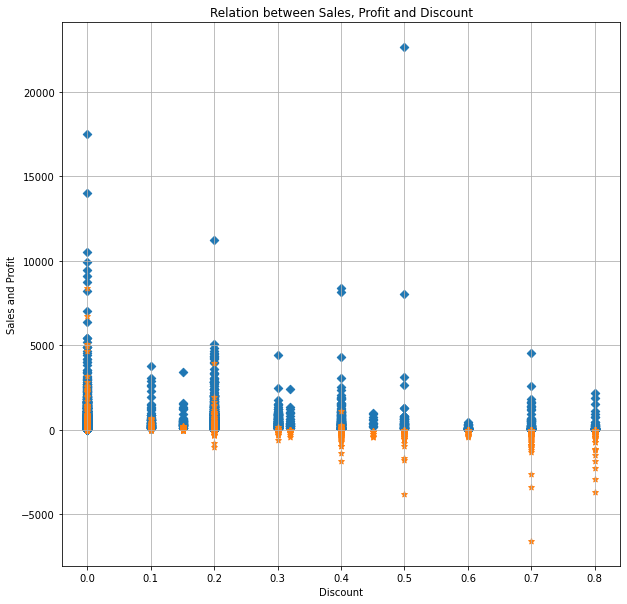

In [18]:
plt.figure(figsize=(10,10))
plt.title("Relation between Sales, Profit and Discount")
plt.xlabel("Discount")
plt.ylabel("Sales and Profit")
plt.grid()
plt.scatter(df["Discount"], df["Sales"], marker="D")
plt.scatter(df["Discount"], df["Profit"], marker="*")
plt.show()